In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# 4.2.1 均方誤差 (mean sauared error)

E = 1/2 $\sum_{k}{(y_k-t_k)^2}$

k: 資料的維度  
yk: 神經網路的輸出  
tk: 正確答案標籤 (label)


In [2]:
# y 是 softmax 的輸出
# t 是訓練資料的 label, 用 1 表示是正確答案。one-hot 表示式
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# ex1: 假設訓練結果，「2」的機率最高時 (0.6)
print("ex1: %f" % mean_squared_error(np.array(y), np.array(t)))
# ex2: 假設訓練結果，「7」的機率最高時 (0.6)
y_7 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print("ex2: %f" % mean_squared_error(np.array(y_7), np.array(t)))


ex1: 0.097500
ex2: 0.597500


# 4.2.2 交叉熵誤差 (cross entropy error)

E = -$\sum_{k}{(t_k * log(y_k))}$

log 是底為 e 的自然對數 ($log_e$)  
tk 是只有正確答案標籤的索引值為 1，其餘為 0 (one-hot)  
實質上此式只有談算對應正確答案標籤為 1 的輸出之自然對數

In [3]:
# 進行 np.log 運算時，要先加上微小值 delta 再計算。因為當 np.log(0) 時，np.log(0) 會變成代表負無限大的 -inf，這樣就無法繼續運算，所以才
# 會加上微小值，防範發上無限大的情況。
def cross_entropy_error(y, t):
    delta = 1e-7 # 10的負7次方
    return -np.sum(t * np.log(y + delta))

# ex1: 假設訓練結果，「2」的機率最高時 (0.6)
print("ex1: %f" % cross_entropy_error(np.array(y), np.array(t)))
# ex2: 假設訓練結果，「7」的機率最高時 (0.6)
print("ex2: %f" % cross_entropy_error(np.array(y_7), np.array(t)))

ex1: 0.510825
ex2: 2.302584


# 4.2.3 小批次學習

前面說明的損失函數範例，討論的是一個資料的損失函數。如果想求出訓練資料的**所有的損失函數和平均**，假設是交叉熵誤差時，可以寫成以下算式

E = -1/N $\sum_{n}\sum_{k}{(t_{nk} * log(y_{nk}))}$

假設資料有 N 筆，而 $t_{nk}$ 代表第 n 筆資料的第 k 個特徵值 ($y_{nk}$ 是神經網路輸出，$t_{nk}$ 是正確答案標籤)  
此式只是把之前的式子擴充成 N 筆資料而已。但最後還要除以 N，進行正規化。也就是求出「平均損失函數」

In [4]:
# ex: 60,000 張訓練資料中，隨機挑選出 10 張

import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
# print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

# 其中，np.random.choice() 可以從指定的數字中，隨機取出想要的數量。
print(np.random.choice(60000, 10))
# print(x_batch)

(60000, 784)
(60000, 10)
[22124 17796 46472 34320 39241 44743 35037 46928  7732 11428]


# 4.2.4 以「批次對應版」執行交叉熵誤差

In [5]:
# why we don't need delta here?
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.xize)
        y = y.reshape(1, y.xize)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

# 4.3.1 微分

$\frac{df(x)}{dx} = \lim_{h\to0} \frac{f(x+h)-f(x)}h$

* 這種利用微小差分來計算微分的方式，稱為數值微分(numerical differentiation)
  * 數值微分含有誤差，所以計算 (x+h) 與 (x-h) 的函數 f 差分，可以減少誤差
  * 這裡的差分是以 x 為主來計算前後的差分，所以稱為中央差分
* 展開算試，計算微分，稱為解析 (analytic)。解析微分可以算出不含誤差的「真微分」
  * ex: $y=x^2$ => $\frac{dy}{dx}=2x$ => 當 x=2 的 y 之微分 = 4

In [6]:
# 中央差分
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h) 

# 4.3.2 數值微分的範例

$ y = 0.01x^2 + 0.1x$

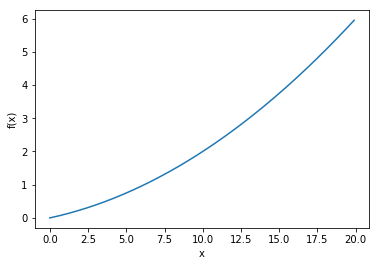

0.1999999999990898
0.2999999999986347


In [7]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1) # 從 0 到 20，以 0.1 為單位的 x 陣列
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

# 此式的解析解是 0.02x + 0.1。因此 x=5、x=10 的「真微分」是 0.2、 0.3
# 與這裡計算出的微分值非常接近，幾乎可視為相同數值的極小誤差
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

# 4.3.3 偏微分

$f(x_0, x_1) = x_0^2 + x_1^2$

Ex1: 當 $x_0=3、x_1=4$ 時，計算$x_0$的偏微分。$\frac{\partial f}{\partial x_0} = 2x_0 = 6$  
Ex2: 當 $x_0=3、x_1=4$ 時，計算$x_1$的偏微分。$\frac{\partial f}{\partial x_1} = 2x_1 = 8$  

這種偏微分與一個變數的微分一樣，都是計算某個位置的斜率。但是，偏微分是在多個變數中，鎖定成為目標的某一個變數，其他變數固定成某個數值。

In [8]:
def function_2(x):
    # return x[0]**2 + x[1]**2
    return np.sum(x**2)

# Ex1，固定 x1=4，求出在 x0=3 時的斜率
def function_tmp1(x0):
    return x0**2 + 4.0**2

print(numerical_diff(function_tmp1, 3.0))

# Ex2，固定 x0=3，求出在 x1=4 時的斜率
def function_tmp2(x1):
    return 3.0**2 + x1**2

print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


# 4.4 梯度

接下來，希望可以一次計算出 $X_0$ 與 $X_1$ 的偏微分。  
假設 $X_0=3$、$X_1=4$，要統一進行 ($x_0$, $x_1$) 兩者的偏微分時，可以當成是要計算 ($\frac{\partial f}{\partial x_0}$, $\frac{\partial f}{\partial x_1}$)  
而($\frac{\partial f}{\partial x_0}$, $\frac{\partial f}{\partial x_1}$)這種把全部變數的偏微分當作向量來統一的方式，稱為**"梯度 (gradient)"**

In [19]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 產生和 x 相同形狀的陣列，其元素初始值皆為 0 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # 計算 f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # 計算 f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 恢復原值
        
    return grad

# 實際算出點 (3,4)、(0,2)、(3,0) 的梯度
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))


[6. 8.]
[0. 4.]
[6. 0.]


# 4.4.1 梯度法

* 梯度是在各個地點，指出減少最多函數值的方向。因此，無法保証梯度指出的位置是否真的是函數的最小值，以及這個方向是否正確。
* 儘管梯度的方向不見得能指出最小值，但是朝向該方向，卻能減少最多的函數值。因此，在討論最小值的位置問題，亦或尋找盡量趨近最小值的函數位置時，必需把梯度當作線索來決定前進方向。
* 梯度法是從目前的位置往梯度方向，只前進一定的距離，接著同樣計算出移動後位置的梯度，再朝者梯度方向前進，重複這種步驟，往梯度的方向移動，就是梯度法 (gradient method)

$x_0 = x_0 - \eta\frac{\partial f}{\partial x_0}$  
$x_1 = x_1 - \eta\frac{\partial f}{\partial x_1}$  

$\eta$ 代表更新的量，稱作學習率 (learning rate)。

* 在神經網路的學習中，通常會一邊調整學習率，一邊確認是否正確學習。
* 學習率太大或太小，都無法得到良好的結果。因此，設定適當的學習率，是非常重要的問題。
  * 學習率太大，會往大數值擴散。
  * 學習率太小，幾乎不會更新就結束。

In [24]:
# f: 要最佳化的函數
# init_x: 初始值
# lr: learning rate
# step_number: 梯度法重複的次數
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

# 假設預設值為 (-3.0, 4.0)，做用梯度法，求出 f(x0, x1) = x0^2 + x1^2 的最小值
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))

# 學習率太大或太小，都無法得到良好的結果
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-6.11110793e-10  8.14814391e-10]
[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


# 4.4.2 神經網路的梯度
* 假設有個形狀只有 2x3、權重為 W 的神經網路，以 L 代表損失函數。此時，可以用 $\frac{\partial L}{\partial W}$ 來表示梯度。

$$ W = \left( \begin{array}{ccc}
    w_{11} & w_{21} & w_{31} \\
    w_{12} & w_{22} & w_{32}
\end{array}\right)$$

$$ \frac{\partial L}{\partial W} = \left( \begin{array}{ccc}
    \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\
    \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{32}}
\end{array}\right)$$

In [33]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1]) # 正確答案標籤

# 執行 simpleNet 類別
net = simpleNet()
print("初始的權重參數:", net.W) # 初始的權重參數

p = net.predict(x)
print("預測值:", p) # 初始的權重參數

print("loss: ", net.loss(x, t))

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

初始的權重參數: [[ 1.66306817 -0.42290058 -1.26053169]
 [ 1.20758069  1.4093993  -0.33296233]]
預測值: [ 2.08466353  1.01471902 -1.05598511]
loss:  3.4672709849310173
[[ 0.43281089  0.14846606 -0.58127696]
 [ 0.64921634  0.22269909 -0.87191544]]


# 4.5.2 執行小批次學習

train_size= 60000
iter_per_epoch= 600.0
i= 0
train acc, test acc | 0.09751666666666667, 0.0974
i= 600
train acc, test acc | 0.7863166666666667, 0.7893
i= 1200
train acc, test acc | 0.87195, 0.8766
i= 1800
train acc, test acc | 0.8974, 0.9014
i= 2400
train acc, test acc | 0.90845, 0.9107
i= 3000
train acc, test acc | 0.9151166666666667, 0.916
i= 3600
train acc, test acc | 0.9196, 0.9223
i= 4200
train acc, test acc | 0.9242, 0.9261
i= 4800
train acc, test acc | 0.9282, 0.9286
i= 5400
train acc, test acc | 0.9305166666666667, 0.9309
i= 6000
train acc, test acc | 0.9339166666666666, 0.9346
i= 6600
train acc, test acc | 0.9365666666666667, 0.9366
i= 7200
train acc, test acc | 0.9395166666666667, 0.9396
i= 7800
train acc, test acc | 0.9414833333333333, 0.9416
i= 8400
train acc, test acc | 0.9437166666666666, 0.9425
i= 9000
train acc, test acc | 0.9442666666666667, 0.9443
i= 9600
train acc, test acc | 0.9472166666666667, 0.9456


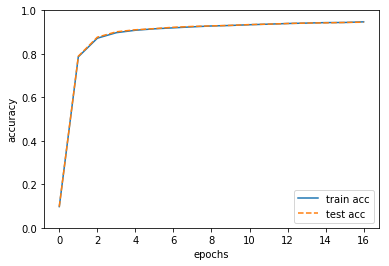

In [36]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()